In [1]:
# Computer Session Week 3: Extending Linear regression in Python

# Import all libraries needed
# Pandas for data manupilation
# Numpy for statistics and numerial analysis
# Matplotlib.pyplot for plots and graphs
#Statsmodels.formula.api for linear regression

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.stats.diagnostic import het_white
from statsmodels.compat import lzip 
import statsmodels.api as sm


In [2]:
# loading the data: start with a name, the command and path name

dmat2=pd.read_excel('C:/PythonData/nls80.xls')  ## replace the path name to the one in your pc

dmat2.head()  # use to check the data are correctly uploaded

dmat2.describe() # This reports key statistics for all the variables in the data.


,wage,hours,iq,kww,educ,exper,tenure,age,married,black,south,urban,sibs,lwage
count,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000
mean,957.945455,43.929412,101.282353,35.744385,13.468449,11.563636,7.234225,33.080214,0.893048,0.128342,0.341176,0.717647,2.941176,6.779004
std,404.360822,7.224256,15.052636,7.638788,2.196654,4.374586,5.075206,3.107803,0.309217,0.334650,0.474358,0.450385,2.306254,0.421144
min,115.000000,20.000000,50.000000,12.000000,9.000000,1.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.744932
25%,669.000000,40.000000,92.000000,31.000000,12.000000,8.000000,3.000000,30.000000,1.000000,0.000000,0.000000,0.000000,1.000000,6.505783
50%,905.000000,40.000000,102.000000,37.000000,12.000000,11.000000,7.000000,33.000000,1.000000,0.000000,0.000000,1.000000,2.000000,6.807935
75%,1160.000000,48.000000,112.000000,41.000000,16.000000,15.000000,11.000000,36.000000,1.000000,0.000000,1.000000,1.000000,4.000000,7.056175
max,3078.000000,80.000000,145.000000,56.000000,18.000000,23.000000,22.000000,38.000000,1.000000,1.000000,1.000000,1.000000,14.000000,8.032035


---------------------------------Distributions of Key Variables---------------------------


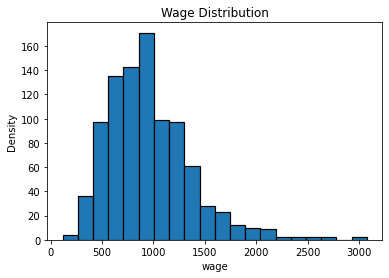

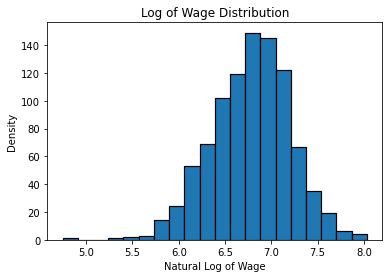

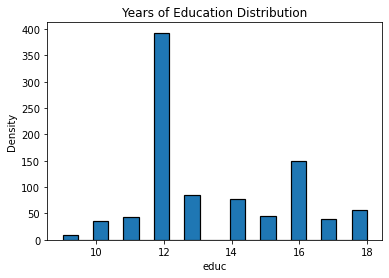

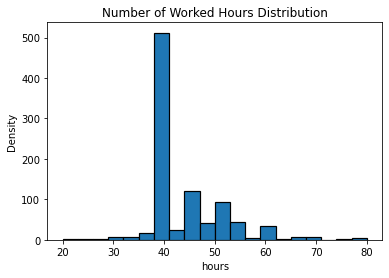

---------------------------------End of Distributions of Key Variables---------------------------


In [3]:
# Refer to the above line to check for desctiptive statistics

# Historgram and distribution of the data of interest - Use this line you are interested to graphically explore the data

print ("---------------------------------Distributions of Key Variables---------------------------")

plt.figure(1)
plt.hist(dmat2['wage'], 20, edgecolor='black', linewidth=1.2)  
plt.xlabel('wage')
plt.ylabel('Density')
plt.title('Wage Distribution')
plt.show()


plt.figure(1)
plt.hist(dmat2['lwage'], 20, edgecolor='black', linewidth=1.2)  
plt.xlabel('Natural Log of Wage')
plt.ylabel('Density')
plt.title('Log of Wage Distribution')
plt.show()


plt.figure(1)
plt.hist(dmat2['educ'], 20, edgecolor='black', linewidth=1.2)
plt.xlabel('educ')
plt.ylabel('Density')
plt.title('Years of Education Distribution')
plt.show()


plt.figure(1)
plt.hist(dmat2['hours'], 20, edgecolor='black', linewidth=1.2)
plt.xlabel('hours')
plt.ylabel('Density')
plt.title('Number of Worked Hours Distribution')
plt.show()


print ("---------------------------------End of Distributions of Key Variables---------------------------")



---------------------------------Scatter Plots:Log Wage against Other variables ----------------


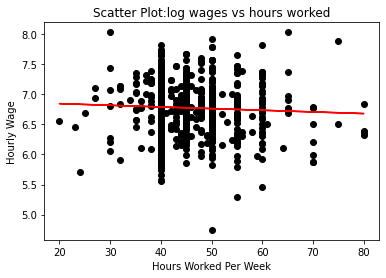

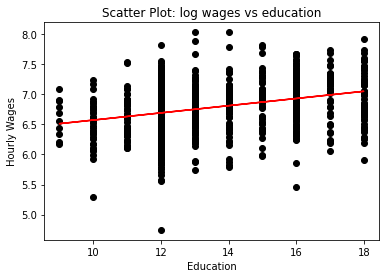

---------------------------------End of Scatter Plots ---------------------------


In [4]:
# Scatter plots:
# There are two purposes here: the first is to explore the relationship between lwage and other forcing variables
# The second purpose is to explore the source of heteroskedasticity if any. 

print ("---------------------------------Scatter Plots:Log Wage against Other variables ----------------")

plt.figure(2)
plt.scatter(dmat2['hours'], dmat2['lwage'], color='black') 

# optional: adding fitted line 
m, b = np.polyfit(dmat2['hours'], dmat2['lwage'], 1)  # m = slope, b=intercept
plt.plot(dmat2['hours'], m*dmat2['hours'] + b, color='red')

# end of option


plt.xlabel('Hours Worked Per Week')
plt.ylabel('Hourly Wage')
plt.title('Scatter Plot:log wages vs hours worked')
plt.show()



plt.figure(2)
plt.scatter(dmat2['educ'], dmat2['lwage'], color='black') 

# optional: adding fitted line 
m, b = np.polyfit(dmat2['educ'], dmat2['lwage'], 1)  # m = slope, b=intercept
plt.plot(dmat2['educ'], m*dmat2['educ'] + b, color='red')

# end of option


plt.xlabel('Education')
plt.ylabel('Hourly Wages')
plt.title('Scatter Plot: log wages vs education')
plt.show()

print ("---------------------------------End of Scatter Plots ---------------------------")


In [5]:
# Next is running a linear regression using OLS estimator

# The linear regression is used only on two varaibles for now. We will extend the analysis later
# The point here is to learn how to run regression and interpret Python output
# The equation: wage=b_0+b_1*educ+b_2*hours+u


formula='lwage ~ educ + hours'  # linear equation, the first variable is dependent and the rest are explanatory
# Please pay attenting to the wording used to describe educ and hours: they are explanatory and not independent. 
# the latter requires very strong assumptions to confirm. In our case, we do not know.

results=smf.ols(formula, dmat2).fit()  # the OLS library, we called the output 'results'


print('******************* Linear Regression Output **********************************')

print(results.summary())

print('*******************************************************************************')



******************* Linear Regression Output **********************************
                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.101
Method:                 Least Squares   F-statistic:                     53.62
Date:                Wed, 20 Oct 2021   Prob (F-statistic):           9.12e-23
Time:                        11:40:20   Log-Likelihood:                -466.72
No. Observations:                 935   AIC:                             939.4
Df Residuals:                     932   BIC:                             954.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------

In [6]:
#The following is optional. You may finn testing restrictions very useful when doing empirical work
# Example:Suppose now you have claim that education should increase the wage rate by 10%.
# We wish to test this claim using the model above.
# We have to run linear restriction test using F test. Here is how is it done.

hypotheses='educ=0.1' # set educ slope to equal 10%. Think why is set this way?  

f_test=results.f_test(hypotheses) # call the results and use them to compute the F test


print('*******************Hypothesis Test**********************************')
print("testing the restriction educ=0.1 =", f_test)
print('********************************************************************')


# You can also try the alternative way

hypotheses='educ-0.1=0' # set educ slope to equal 10%. Think why is set this way?  

f_testa=results.f_test(hypotheses) # call the results and use them to compute the F test


print('*******************Hypothesis Test**********************************')
print(f_testa)
print('********************************************************************')


# This what you have been doing in Data Analytics. Now we need to go beyond the basics.
# First, does your regression satisfy the two assumptions we set in theory? 
# If it fails to do so, then the OLS estimator is not BLUE and we cannot rely on it.

# Start with the error term: Heteroskedasticity
# Step 1: Inspect residuals, Step 2: formally test them


*******************Hypothesis Test**********************************
testing the restriction educ=0.1 = <F test: F=array([[42.27688524]]), p=1.2897781191757014e-10, df_denom=932, df_num=1>
********************************************************************
*******************Hypothesis Test**********************************
<F test: F=array([[42.27688524]]), p=1.2897781191757014e-10, df_denom=932, df_num=1>
********************************************************************


---------------------------------Plot of Residuals ---------------------------
Use the plot to visually inspect the presence of autocorrelation


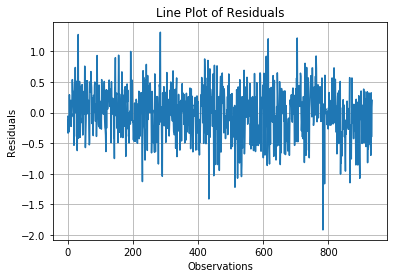

The plot of residuals shows a random patterns across individuals. This may suggest the presence of no autocorrelation
---------------------------------End of Plot of Residuals ---------------------------


In [41]:
# Let's now learn about the properties of the residuals
# Begin with plotting residuals 
# The plot of residuals against observations will help to detect the presence of autocorrelation in the data

print ("---------------------------------Plot of Residuals ---------------------------")
print ("Use the plot to visually inspect the presence of autocorrelation")
plt.figure(1)
plt.plot(results.resid) 
plt.xlabel('Observations')
plt.ylabel('Residuals')
plt.title('Line Plot of Residuals')
plt.grid(True) # I have added this for me to be able to accurately see the graph
plt.show()

print("The plot of residuals shows a random patterns across individuals. This may suggest the presence of no autocorrelation")
print ("---------------------------------End of Plot of Residuals ---------------------------")



In [8]:
#Inspecting heteroskedacitiy formally using the white test

mean_resid=results.resid.mean()
print(mean_resid)



print ("---------------------------------White Test------------------------------------------")

# White test for heteroskedasticity
name=['LM Stat', 'pvalue', 'f-value', 'f pvalue' ]
white_test =sms.het_white(results.resid,results.model.exog)  # make sure you have the right library

print(lzip(name,white_test))

     
print ("--------------------------------- End of White Test------------------------------------------")

# If there is heteroskedasticity, then we need to correct it. The previous regression is incorrect
# because it is based on the wrong aussmption about the errors and therefore the t statistics are
# incorrect.

# White Robust Standard Errors



2.1753246856826598e-16
---------------------------------White Test------------------------------------------
[('LM Stat', 12.695550691489338), ('pvalue', 0.026405108745409106), ('f-value', 2.557543032831767), ('f pvalue', 0.026138681933936467)]
--------------------------------- End of White Test------------------------------------------


In [10]:
# Restimate the model using White Robust Standard Errors

formula='lwage ~ educ + hours'  # linear equation, the first variable is dependent and the rest are explanatory
# Please the wording used to describe educ and hours: they are explanatory and not independent. 
# the latter requires very strong assumptions to confirm. In our case, we do not know.

results1=smf.ols(formula, dmat2).fit(cov_type='HC1')  # the OLS library, we called the output 'results'

print('******************* Linear Regression Output **********************************')

print(results1.summary())

print('*******************************************************************************')


******************* Linear Regression Output **********************************
                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.101
Method:                 Least Squares   F-statistic:                     51.39
Date:                Wed, 20 Oct 2021   Prob (F-statistic):           6.74e-22
Time:                        11:45:00   Log-Likelihood:                -466.72
No. Observations:                 935   AIC:                             939.4
Df Residuals:                     932   BIC:                             954.0
Df Model:                           2                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------

In [13]:
# Testing for autocorrelation using Breusch-Godfrey test
   
print ("---------------------------------BG Test------------------------------------------")

# Breusch Godfrey Test
name=['LM Stat', 'pvalue', 'f-value', 'f pvalue' ]
bg_test =sms.acorr_breusch_godfrey(results, nlags=1, store=False)  # make sure you have the right library

print(lzip(name,bg_test))

     
print ("--------------------------------- End of BG Test------------------------------------------")



---------------------------------BG Test------------------------------------------
[('LM Stat', 12.975362037823393), ('pvalue', 0.00031561682417138046), ('f-value', 13.101669478065588), ('f pvalue', 0.00031093250627160275)]
--------------------------------- End of BG Test------------------------------------------


In [14]:
# Correcting for aurocorrelation using Newey West Robust Standard Errors



formula='lwage ~ educ + hours'  # linear equation, the first variable is dependent and the rest are explanatory
# Please the wording used to describe educ and hours: they are explanatory and not independent. 
# the latter requires very strong assumptions to confirm. In our case, we do not know.

results2=smf.ols(formula, dmat2).fit(cov_type='HAC',cov_kwds={'maxlags':1, 'use_correction':True})  # the OLS library, we called the output 'results'

print('******************* Linear Regression Output **********************************')

print(results2.summary())

print('*******************************************************************************')



******************* Linear Regression Output **********************************
                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.101
Method:                 Least Squares   F-statistic:                     51.02
Date:                Wed, 20 Oct 2021   Prob (F-statistic):           9.44e-22
Time:                        11:48:29   Log-Likelihood:                -466.72
No. Observations:                 935   AIC:                             939.4
Df Residuals:                     932   BIC:                             954.0
Df Model:                           2                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------